## Convolution Neural Network

### A Hello World Program for CNN: Fashion MNIST

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [2]:
dataset = keras.datasets.fashion_mnist

In [3]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Book']

In [4]:
(x_train,y_train),(x_test,y_test) = dataset.load_data()

In [5]:
assert x_train.shape == (60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

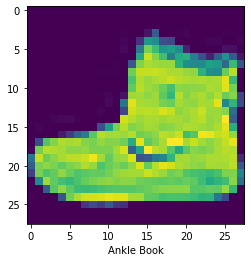

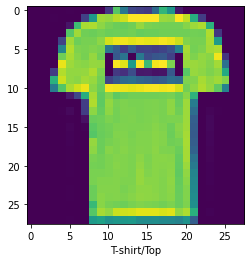

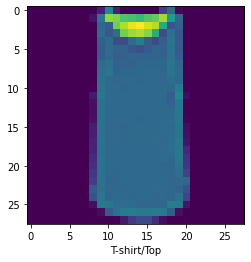

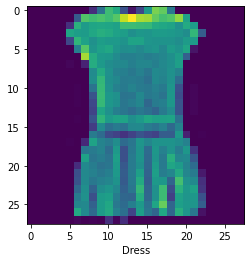

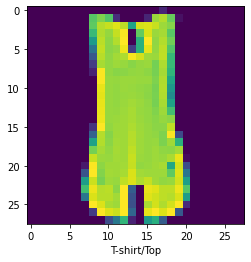

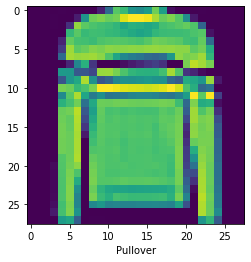

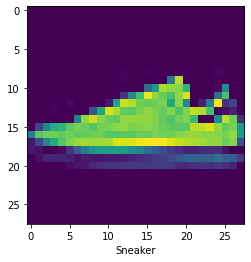

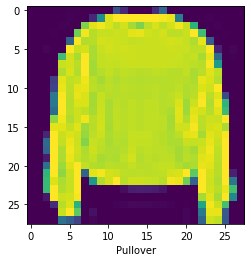

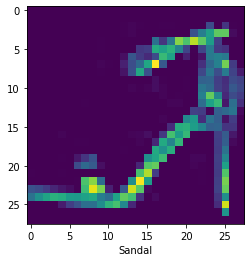

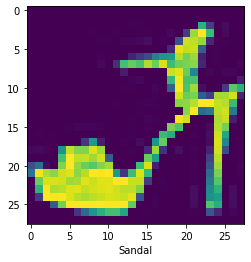

In [9]:
for i in range(10):
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
    plt.show()

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

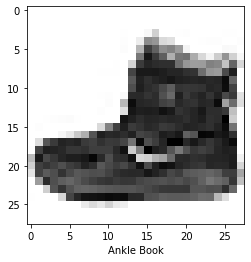

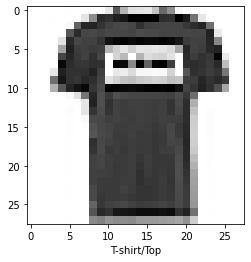

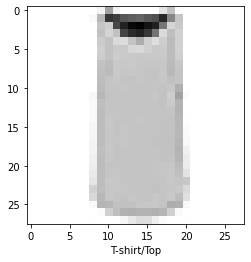

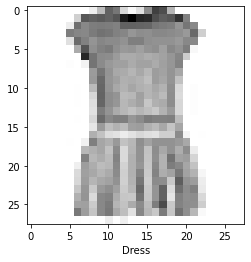

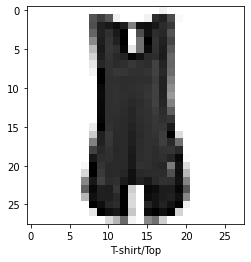

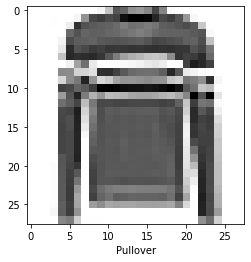

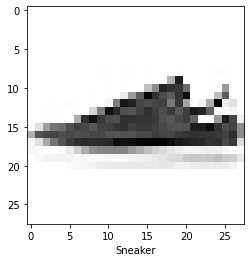

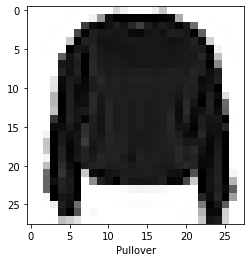

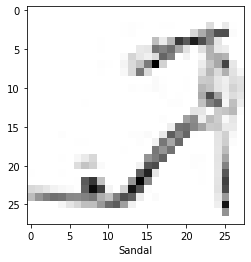

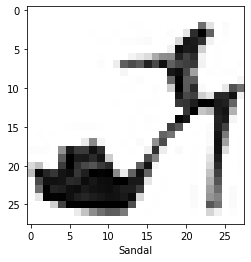

In [12]:
for i in range(10):
    plt.imshow(x_train[i],cmap="Greys")
    plt.xlabel(class_names[y_train[i]])
    plt.show()

In [13]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(64,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

In [14]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [15]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10


/home/lucifertrj/.local/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 3s 1ms/step - loss: 0.5253 - accuracy: 0.8168
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3915 - accuracy: 0.8612
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3557 - accuracy: 0.8727
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3313 - accuracy: 0.8801
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3145 - accuracy: 0.8859
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3011 - accuracy: 0.8888
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2880 - accuracy: 0.8939
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2797 - accuracy: 0.8967
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2703 - accuracy: 0.9007
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2628 - accurac

In [16]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8785


In [17]:
model = keras.models.Sequential([
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
keras.layers.Flatten(),
keras.layers.Dense(64,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30976)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [19]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [21]:
model.fit(x_train,y_train,epochs=5,callbacks=keras.callbacks.EarlyStopping(patience=2))

Epoch 1/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.3284 - accuracy: 0.8810
Epoch 2/5
1875/1875 [==============================] - 140s 74ms/step - loss: 0.2377 - accuracy: 0.9123
Epoch 3/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.1958 - accuracy: 0.9268
Epoch 4/5
1875/1875 [==============================] - 155s 83ms/step - loss: 0.1596 - accuracy: 0.9411
Epoch 5/5
1875/1875 [==============================] - 175s 93ms/step - loss: 0.1337 - accuracy: 0.9507
